In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Carregar dados
data = pd.read_csv('data_/TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-09,22.366667,22.900000,22.098000,22.568666,22.568666,81493500
1,2019-01-10,22.293333,23.025999,22.119333,22.997999,22.997999,90846000
2,2019-01-11,22.806000,23.227333,22.584667,23.150667,23.150667,75586500
3,2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500
4,2019-01-15,22.333332,23.253332,22.299999,22.962000,22.962000,90849000


In [6]:
# Criar características (features) com base nos dados
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['Volume_shifted'] = data['Volume'].shift(1)
data.dropna(inplace=True)

In [7]:
features = ['MA5', 'MA10', 'Volume_shifted']
X = data[features]
y = data['Close']

In [8]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever preços para o conjunto de teste
predictions = model.predict(X_test)

In [10]:
# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 48.75447010434333


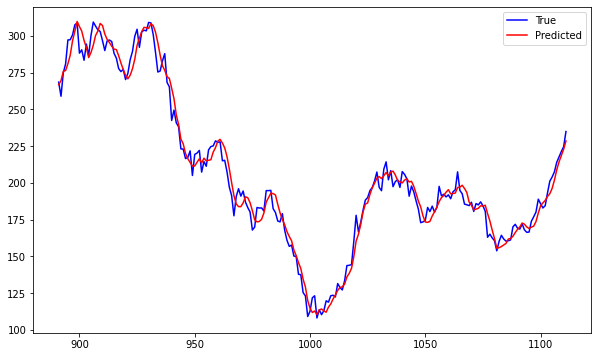

In [11]:
# Visualizar previsões vs valores reais
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='True', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()